  # Statistische Tests mit Python
  
 Prof. Stefan Rist

Bei den Statistischen Tests versucht man Hypothesen anhand von Stichprobendaten zu falsifizieren. Gelingt dies nicht so wird eine Hypothese beibehalten bzw. als richtig erachtet. 

Wichtig ist, dass wir eine Hypothese niemals beweisen (Karl Poper) sondern immer nur falsifizieren können. Ein Beibehalten einer Hypothese kann also immer als Freispruch aus Mangel an Beweisen gesehen werden.

Für das prinzipielle Vorgehen halten wir uns an die Methodenberatung der ETH Zürich

https://www.methodenberatung.uzh.ch/de.html

und übertragen bestimmte Inhalte in python

Zunächst laden wir die üblichen Bibliotheken und nach und nach werden wir noch weitere spezielle Bibliotheken dazuladen

In [ ]:
import numpy as np # enthält viele mathematische Funktionen
import pandas as pd
import matplotlib.pyplot as plt   # zum erstellen von Graphen
import plotnine as p9 #ggplot für Graphen
from pathlib import Path
import random as rand
import scipy.stats as stats # statistik Modul

plt.rcParams["figure.figsize"]=8,6 #Größe aller Bilder in diesem Notebook

#Ordner mit Daten  es muss ein Ordner data im selben Verzeichnis existieren mit den Daten
DATA = Path().resolve() / 'data'
display(DATA)

In [ ]:
#import sys
#!conda install --yes --prefix {sys.prefix} PAKETNAME

#import sys
#!conda install --yes --channel conda-forge --prefix {sys.prefix} PAKETNAME

## Grundlagen

In diesem Abschnitt wollen wir die grundlegende Vorgehensweise bei einem statistischen Test betrachten. <br>
Wir verwenden dazu das folgende Beispiel:<br>
In einer Brauerei wurden während der Tagesproduktion $n=25$ Flaschen Bier gezogen und deren Füllmenge gemessen. Die Stichprobe ergab einen Mittelwert $\bar{X}=499,28$. Die übliche Standardabweichung der Abfüllanlage ist laut Spezifikation $\sigma = 1.5 ml$

Die Frage die wir uns stellen: <br>
Deutet die Abweichung auf eine Fehlfunktion der Anlage hin, da die Sollmenge nicht exakt $500$ml beträgt oder ist diese Abweichung im Bereich der zu erwartenden Schwankungen?

### Vorgehen nach Fischer

Beim Vorgehen nach Fischer machen wir die folgenden Schritte:

1) **Formulieren einer Nullhypothese $H_0$:** <br>
Die Nullhypothese die man formuliert gilt es zu widerlegen. Um eine quantitative Aussage treffen zu können wählt man einen Kennwert der aus der Stichprobe berechnet werden kann und der sensitiv auf die Fragestellung in der Nullhypothese ist. Außerdem sollte die Verteilung des Kennwertes (Teststatistik) bekannt sein.

Für unsere Nullhypothese nehmen wir $H_0: \mu = 500$

2) **Bestimmen der Teststatistik $T$** <br>
Als sensitiver Kennwert wählen wir den Stichprobenmittelwert $\bar{X}$ und für die Teststatistik nehmen wir
$$T = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}} \sim N(0,1) $$

3) **Bestimmen des Annahme bzw. Ablehnungsbereiches von $H_0$ und Test** <br>
Wir legen eine kritische Region fest in die der Wert der Teststatistik unter Annahme der Gültigkeit von $H_0$ mit einer
sehr kleinen wahrscheinlichkeit fällt (meist $\alpha = 5\%$ oder $\alpha = 1\%$). Dem Wert $1-\alpha$
nennt man das **Signifikanzniveau des Tests**. Nimmt die Teststatistik in unserem Experiment einen Wert in dieser Region an, so wird $H_0$ mit dieser Signifikant abgelehnt. Andernfalls wird $H_0$ beibehalten.

 Wie in dem Bild zu sehen ist liegt der Annahmebereich in unserem Beispiel $T \in [-z_{\alpha/2},z_{\alpha/2}]$ 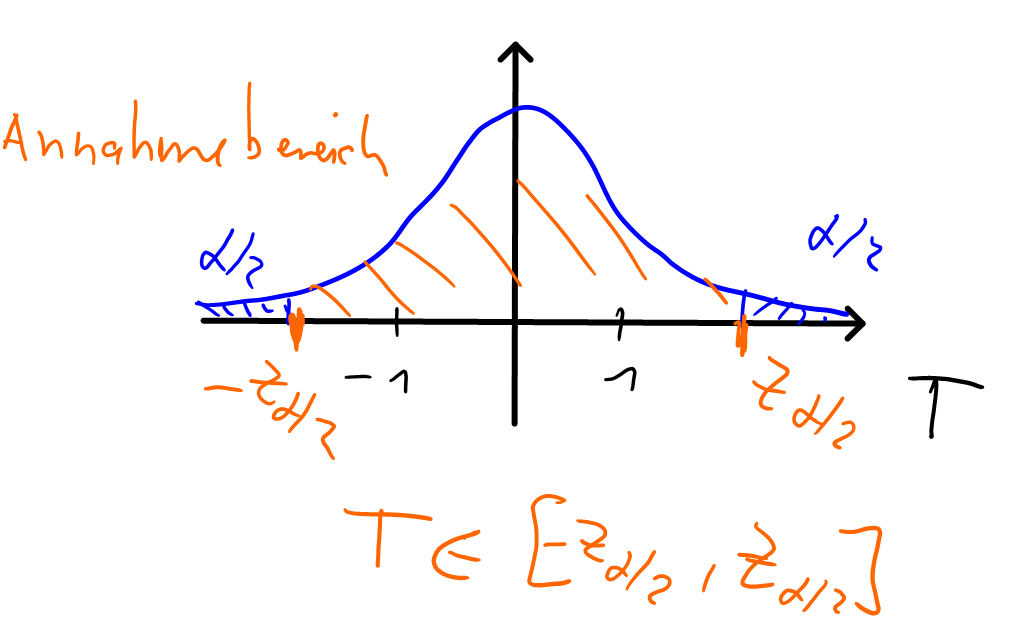
 
 Wir prüfen nun $H_0$ für unsere Daten

In [ ]:
Xbar = 499.28 # Stichprobenmittelwert
sigma = 1.5 # echte Standardabweichung
mu = 500 # Echter Mittelwert (Soll Mittelwert)
n = 25 # Stichprobengröße

T =round((Xbar - mu)/(sigma/np.sqrt(n)),3) # Wert der Teststatistik
print('Wert der Teststatistik:',T,'\n')

from scipy.stats import norm # Importieren der Normalverteilung

#Test auf 5% Signifikanzniveau'
alpha = 5/100
z_alpha_halbe = norm.ppf(1-alpha/2)
print('Annahmebereicht bei 95% Signifikanz:',[-round(z_alpha_halbe,3),round(z_alpha_halbe,3)],'\n')

#Test auf 1% Signifikanzniveau
alpha = 1/100
z_alpha_halbe = norm.ppf(1-alpha/2)
print('Annahmebereicht bei 99% Signifikanz:',[-round(z_alpha_halbe,3),round(z_alpha_halbe,3)],'\n')


Wir sehen, auf einem $95\%$ Niveau wird $H_0$ abgelehnt d.h. wir betrachten die Anlage als fehlerhaft. Auf einem $99\%$ Nivau
wird $H_0$ allerdings beibehalten.

**Aufgabe**: <br>
Formulieren Sie in Worten was das Signifikanzniveau bzw. der Wert $1-\alpha$ für unseren Test bedeutet.




### Der p-Wert eines Statistischen Tests

Die Nullhypothese wird bei diesem Vorgehen nicht verifiziert sondern nur abgelehnt, wenn das Ergebnis einer Stichprobe unter Annahme der Gültigkeit der Nullhypothese äußerst unwahrscheinlich ist.
D.h. das nicht Ablehnen der Nullhypothese ist keinesfalls ein Beweis für deren Gültigkeit. Man könnte es lediglich als 
_Freispruch aus Mangel an Beweisen_ bezeichnen.
Anstelle des vorab festgelegten $\alpha$ wird häufig ein p-Wert angegeben. 

**Definition: p-Wert eines statistischen Tests:** 

Der p-Wert eines statistischen Tests ist die Wahrscheinlichkeit bei Gültigkeit der Nullhypothese $H_0$ den beobachteten
(oder noch extremeren d.h. $H_0$ schädlich) Datensatz zu erhalten.  <br>
Man kann auch sagen, dass der p-Wert die Wahrscheinlichkeit ist durch das Ablehnen der Nullhypothese einen Fehler zu machen.

Ist der von einem statistischen Test berechnete p-Wert kleiner als der zuvor festgelegte $\alpha$-Fehler z.B. $p<0.05$
dann lehnt man die Nullhypothese auf diesem Signifikanzniveau $(1-\alpha)$ ab.

Für unser obiges Beispiel gilt:

In [ ]:
p = norm.cdf(T)*2 # Faktor 2 weil wir beidseitig testen
print('p-Wert unseres Tests:',round(p,4))

Konsistent mit unseren obigen Ergebnissen würden wir H0 auf dem 95\% Niveau ablehnen und auf dem 99% Niveau annehmnen. 

### Vorgehen nach Neyman-Pearson-Wolf (NPW)

Die drei Statistiker haben das Vorgehen von Fischer entscheidend modifiziert und verfeinert. Das entscheidende Element ist die Einführung einer Alternativhypothese. Die daraus folgenden Fehlerarten veranschaulichen wir uns am sogenannten Vierfelder-Modell:

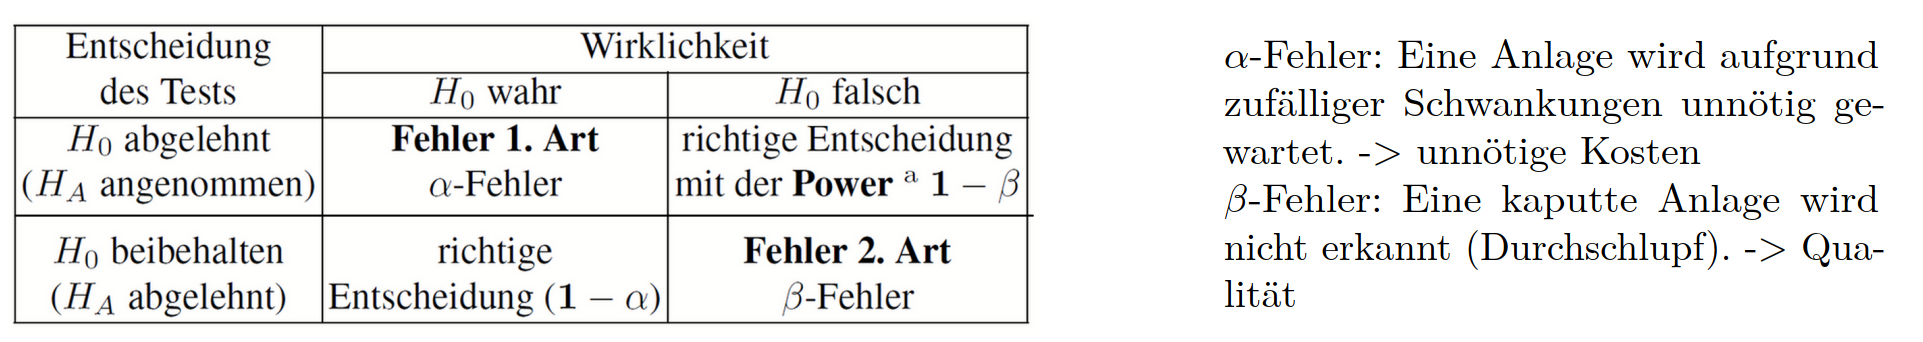

In der Regel haben der $\alpha$-Fehler und $\beta$-Fehler gegenläufige Interdependenzen die sehr stark vom Schwellenwert für $\alpha$ abhängen. Soll $\alpha$ klein sein
(falsch positiv, d.h. ein tatsächlicher Effekt wird nicht erkannt), so wird 
in der Regel $\beta$ (falsch negativ, ein nicht vorhandener Effekt wird als vorhanden bewertet) groß.
Wählen wir $\alpha$ in unserem Beispiel sehr klein, dann ist die Wahrscheinlichkeit, dass die Anlage stillgelegt wird obwohl sie
die Spezifikationen erreicht sehr klein. Allerdings ist dann auch die Wahrscheinlichkeit, dass die Anlage weiterläuft obwohl die Spezifikationen nicht erreicht werden sehr groß.

Den Wert $1-\beta$ nennt man die **Power** des statistischen Tests.

**Übung:** <br>

Mit Hilfe eines Algorithmus für die Gesichtserkennung soll der Zugriff auf Daten beschränkt werden.
Stellen Sie sich vor Sie müssen die Sensitivität für diesen Algorithmus setzen, wobei es nicht möglich ist den
$\alpha$-Fehler sehr klein zu machen ohne dass der $\beta$-Fehler sehr groß wird.

a) Was beschreiben $\alpha$ und $\beta$ Fehler? <br>
b) Welche Werte würden Sie für $\alpha$ und $\beta$ nehmen wenn aus technischen Gründen $\alpha \cdot \beta \ge 0.01$ gilt und

  - der Algorithmus Ihr Handy entsprerren soll.
  - der Algorithmus den Hochsicherheitstrakt des BND freigeben soll.
  - Wie beurteilen Sie die Performance des Algorithmus?
  



**Lösung:** <br>



Das komplette Vorgehen nach NPW ist dann wie folgt:

1) **Formulieren der Nullhypothese $H_0$ und der Alternativhypothese:** <br>

Für unseren Fall nehmen wir $H_0: \mu = 500$, $H_A: \mu = \mu_A \ne 500$

2) **Bestimmen der Teststatistik $T$** <br>
Als sensitiver Kennwert wählen wir den Stichprobenmittelwert $\bar{X}$ und für die Teststatistik nehmen wir
$$T = \frac{\bar{X}-\mu}{\sigma/\sqrt{n}} \sim N(0,1) $$

3) **Bestimmen des Signifikanzniveaus und Ablehnungsbereiches von $H_0$** <br>
Wir wählen den $\alpha$-Fehler und erhalten damit das $1-\alpha$ Signifikanzniveau. Der Annahme und Ablehungsbereich
ergibt sich gleich wie beim Vorgehen nach Fischer.

4) **Fallzahlplanung und gewünschte Power des Tests** <br>

Die Fallzahl $n$ (Größe der Stichprobe) hat Einfluss auf die Varianz der Prüfgröße $T$ und bestimmt damit die Power $(1-\beta)$ des statistischen Tests. Je größer $n$ gewählt wird desto trennschärfer wird ein Test.

Der Fehler 2ter Art oder $\beta$-Fehler ist die Wahrscheinlichkeit, einen real vorhandenen Effekt (die alternativ Hypothese $H_A$ ist gültig) auf Basis einer unauffälligen Stichprobe zu übersehen. Diese Wahrscheinlichkeit wird umso kleiner je größer $n$ gewählt wird.

Aus einer höheren Fallzahl $n$ resultiert bei festem Sifnifikanzniveau 


- und festgelegter Power die Möglichkeit auf kleinere Abweichungen zu testen. ($\beta$ fest $|\mu-\mu_A|\to 0$) <br>
  _In unserem Fall könnten wir kleinere Abweichungen zur Sollmenge feststellen._
  
- und festgelegter Abweichung eine höhere Power des Tests. ($|\mu-\mu_A|$ fest $\beta \to 0$) <br>
  _In unserem Fall reduziert sich die Wahrscheinlichkeit eine fehlerhafte Anlage zu übersehen wenn wir eine gegebene Abweichung als fehlerhafte Anlage definieren._ 


Je höher die Fallzahl, desto besser ist also der Test. Allerdings gibt es in der Praxis oft Gründe die gegen eine Erhöhung der Fallzahl wie z.B. bereits vorhandene Daten, Zeitdruck oder Kosten sprechen. 
Es gilt also genau Abzuwägen welche Kombination von Signifikanzniveau, Power und Fallzahl die beste ist für das konkrete Problem. Wir wollen uns nun diesen Zusammenhang am Beispiel des Gauss Tests im Detail ansehen. 

Wir führen die Effektstärke ein $$ \delta = \frac{|\mu-\mu_A|}{\sigma} = \frac{\rm zu \, detektierender \,Fehler}{\rm Streuung \, Einzelmessung} $$

Für die Fallzahl gilt dann  $$ n = \left ( \frac{z_{\alpha/2}+z_\beta}{\delta} \right ) ^2 $$ 

In der Regel nimmt man ein Signifikanzniveau von $5\%$ oder $1\%$ und eine Power $1-\beta > 80\%$.
Im konkreten Fall sollten die Kosten und Risiken der beiden Fehler bewertet werden und man enscheidet sich basierend darauf auf einen $\alpha$ und $\beta$-Wert.

Mit der **Gütefunktion** des Test bezeichnet man die Power $1-\beta$ als Funktion der Effektstärke $\delta$. 
Die im folgenden gemachten Schlussfolgerungen gelten ganz allgemein auch für statistische Test bei denen die Gütefunktion nicht direkt berechnet werden kann.
Im Falle des Gausstest ist es jedoch möglich die Gütefunktion analytisch zu berechnen. Sie lautet 
$$ G(\delta) = 1- \Phi(z_{\alpha/2}-\sqrt{n}\cdot \delta) + \Phi(-z_{\alpha/2}-\sqrt{n}\cdot \delta) $$

Dabei ist die $\Phi(x) = \int_{-\infty}^x \phi(x) dx$ die Verteilungsfunktion der Normalverteilung.
In der Darstellung ist die Gütefunktion für den Gausstest für verschiedene Signifikanznivaus und fester Fallzahl bzw. für festes $\alpha$ und verschiedene Fallzahlen gezeigt.
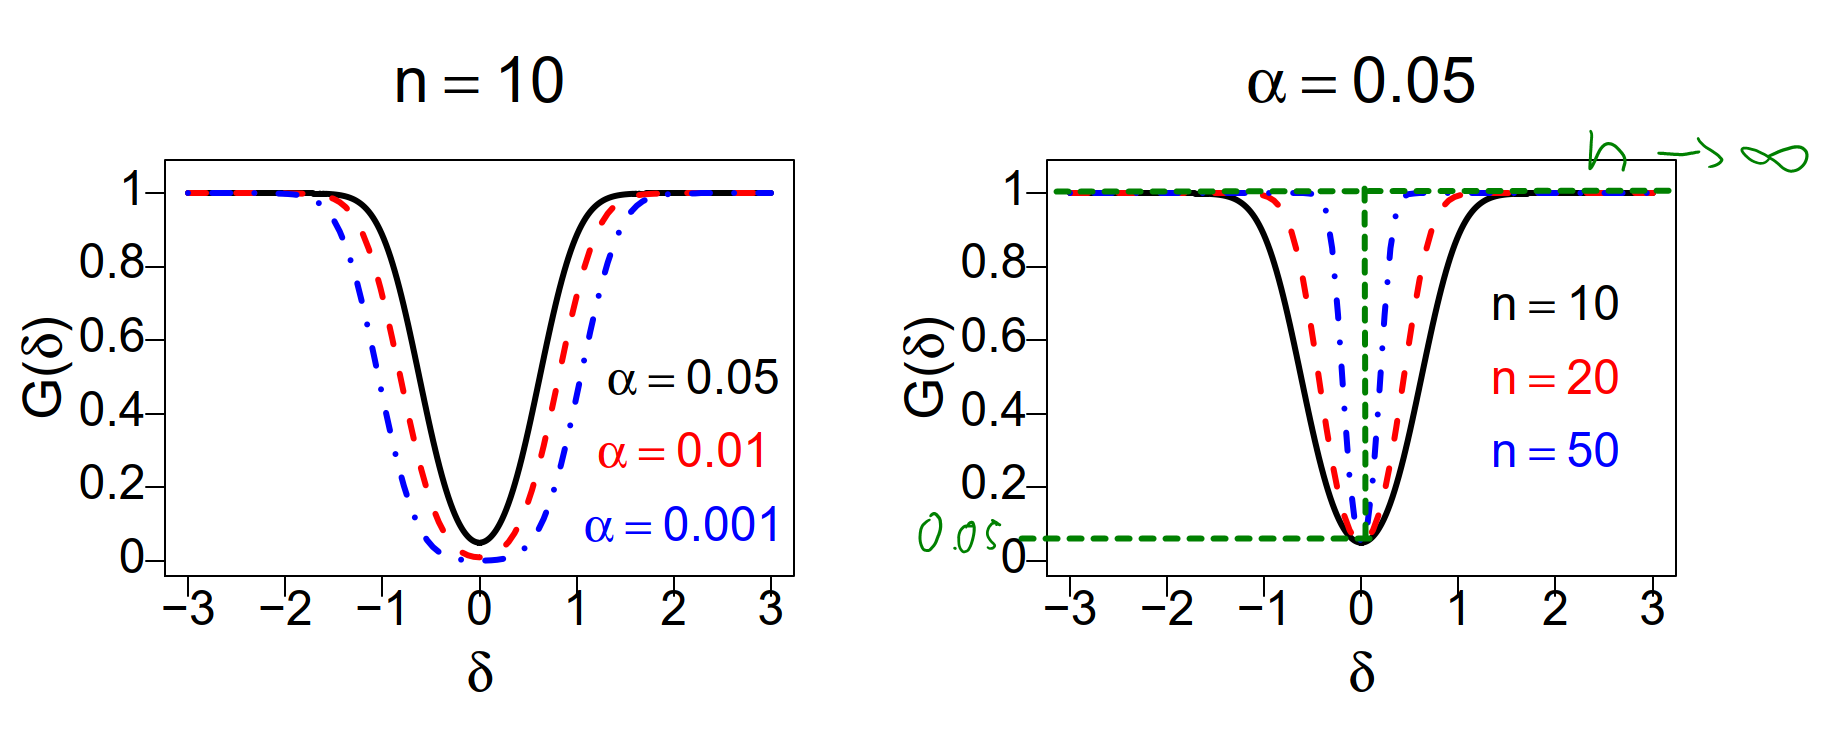

Wir sehen wie für eine feste Fallzahl die Mulde mit kleiner Power für Höhere Signifikanzniveaus ($\alpha \to 0$ ) 
immer breiter wird während der Test für größere Fallzahlen (und $\alpha$ fest) immer trennschärfer wird. Für $n\to \infty$ können prinzipiell beliebig kleine Abweichungen mit $100\%$ Power festgestellt werden.

5) **Annahme oder Ablehnung von $H_0$** <br>
Die Zufallsstichprobe mit der zuvor bestimmten Fallzahl wird entnommen und der Kennwert der Teststatistik wird berechnet.
Fällt der Wert in den kritischen Bereich unter Punkt 3 so wird die Nullhypothese zugunsten der Alternativhypothese abgelehnt. Dieses Vorgehen ist exakt gleich wie beim Vorgehen nach Fischer. Allerdings können wir jetzt noch für eine bestehende Stichprobe die Güte des Tests berechnen oder wie zuvor erklärt eine bestimmte Güte fordern und dadurch die Fallzahl bestimmen.



**Übung**

a) Wir wählen für unser Beispiel die Werte $\alpha = 5\%$, $\beta = 10\%$ und $|\mu_A - \mu| < 1ml$ <br>
   <t>Geben Sie in Worten die Bedeutung dieser Werte für unser Beispiel und bestimmen Sie die erforderliche Fallzahl.
   
b) Bestimmen Sie die Power für unseren Test aus dem Vorgehen nach Fisher.
    

In [ ]:
# Lsg a)

n = 0

print('Die benötigte Fallzahl ist:',round(n))


#Lsg b)
n = 25
G = 0

print('Die Power des Tests ist:',round(G,2))

## Verfahren der statistischen Datenanalyse

In der unten gezeigten Abbildung ist der Entscheidungsbaum für die Wahl der statistischen Tests für verschiedene 
Fragestellungen gezeigt. Wir werden im folgenden die einzelnen Stränge dieses Baumes untersuchen und die einzelnen Methoden vorstellen. 

Es sei hier bemerkt, dass für eine bestimmte Fragestellung meist mehr als nur ein Test zur Verfügung steht. Welcher Test
die besten Ergebnisse zeigt ist oft auch unter Experten umstritten und hängt von den speziellen Umständen der Fragestellung ab. Wir werden in dieser Vorlesung nur einen kleinen Teil der möglichen statistischen Tests vorstellen und jeweils die Voraussetzungen für deren Gültigkeit besprechen. Sind diese Voraussetzungen verletzt, so liefern die meisten Tests in vielen Fällen dennoch gute Ergebnisse, aber deren Gültigkeit muss angezweifelt werden und eventuell sollte der Anwender nach alternativen Tests recherchieren.

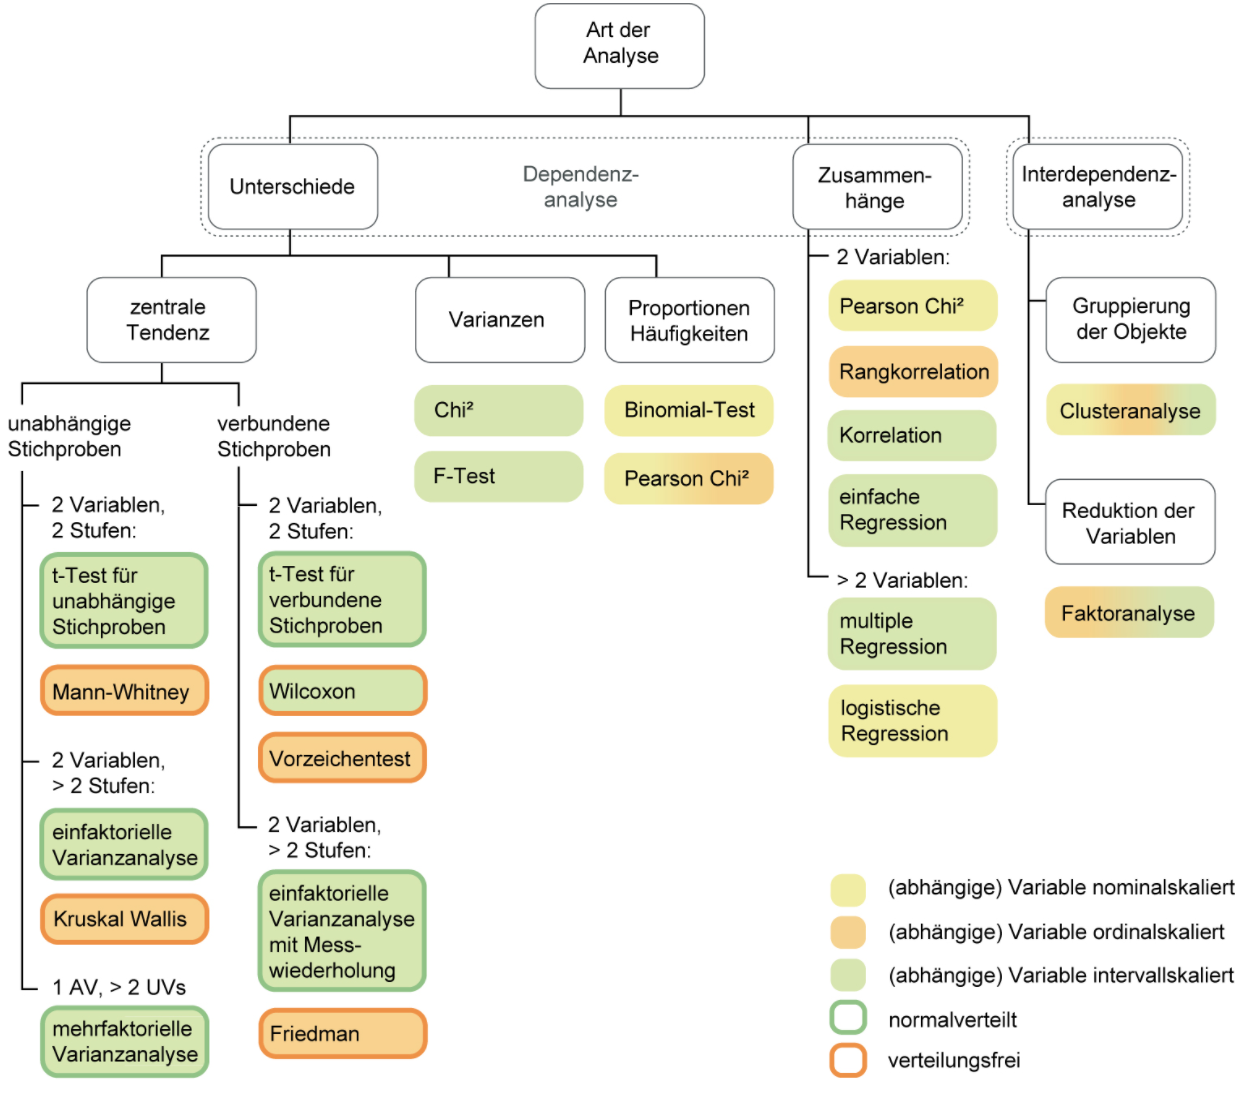

Entscheidungsbaum aus https://www.methodenberatung.uzh.ch/de.html

### Test auf Normalverteilung

Zunächst erkennen wir, dass die Auswahl der Test stark davon abhängt ob die Daten Normalverteilt sind oder nicht. Um zu überprüfen ob Daten normalverteilt sind verwenden wir den Shapiro-Wilk Test oder plotten die Daten anhand eines q-q Plots.

In [ ]:
# Laden der heights Daten
heights_file = DATA / 'heights_data.csv'

#help(pd.read_csv)
heights = pd.read_csv(heights_file,index_col = 0)
display(heights.head()) # mit .head() werden die ersten 5 Zeilen dargestellt

#Sind die Körpergrößen der Männer Normalverteilt?
heights["height_cm"] = heights.height*2.54 #zuerst berechnen wir die Größe in cm

#Mittelwert und Standardabweichung der Größen
men = heights.query('sex == "Male"').copy()
mu = men.height_cm.mean()
sigma = men.height_cm.std()
print('Größe in cm Männer: mu = ',mu,' sigma = ',sigma)

Bei einem qq-Plot werden die Quantile einer theoretischen Verteilung gegen die Quantile der Daten geplottet. Entsprechen die Daten der theoretischen Verteilung, dann sollte das Diagramm eine Gerade sein. Im Falle der Normalveteilung kann man die unskalierten Daten gegen die Normalverteilung mit Stichprobenmittelwert und Stichprobenstandardabweichung plotten oder zuerst die Daten skalieren und dann gegen eine Normalverteilung plotten. Im 2ten Fall sollten die Daten auf der Ursprungsgeraden $y=x$ liegen.

In [ ]:
#für den qq-Plot verwenden wir wieder die ggplot Bibliothek

#Unskalierte Daten
g1 = (p9.ggplot(men, p9.aes(sample = "height_cm")) + 
      p9.geom_qq(dparams = [mu,sigma]) +
      p9.geom_abline(color = "blue") +p9.ggtitle("QQ-Plot, Daten - Normalverteilung")
     )
print(g1)

# Skalierte Daten
men['height_cm_scaled'] = (men.height_cm-men.height_cm.mean())/men.height_cm.std()
g2 = (p9.ggplot(men, p9.aes(sample = "height_cm_scaled")) + 
      p9.geom_qq(dparams = [0,1]) +
      p9.geom_abline(color = "blue") +p9.ggtitle("QQ-Plot, Skalierte Daten - Standard-Normalverteilung")
     )
print(g2)
    
    

Wir sehen, dass die Männer zwischen 1.60m und 1.95m recht gut normalverteilt sind, die Männer die kleiner bzw. größer als diese Werte sind passen nicht so recht in eine Normalverteilung. Dies ist ein häufiges Phänomen in der Praxis, dass die "mittleren" Daten recht gut einer Normalverteilung folgen und die Extremwerte davon abweichen.

- kleine Männer: <br>
das theoretische 1.50m Quantil stimmt mit dem 1.35m Quantil der Daten überein. Das bedeutet, dass in den Daten die Anzahl der Männer bis 1.30m soviel ausmachen wie es in der Theorie Männer bis 1.50m geben sollten. D.h. die Daten haben zuviele kleine Männer.

Wir wollen nun diese Aussage noch überprüfen


In [ ]:
#sehr kleine Männer
small_men_data = men.query('height_cm < 155').shape[0]/men.shape[0] 
small_men_theory = norm(mu,sigma).cdf(155)

print('In den Daten sind',round(small_men_data*100,2),'% der Männer sehr klein (<155)')
print('In der Theorie sind',round(small_men_theory*100,2),'% der Männer sehr klein (<155)')



In [ ]:
g3 = (p9.ggplot(men, p9.aes(x = "height_cm", y= "..density..")) + 
      p9.geom_histogram(binwidth = 5,fill = 'blue',color = 'black') + # blaue Balken, schwarze Ränder im 5cm Abstand
      p9.geom_line(men, p9.aes(x = "height_cm", y= norm(mu,sigma).pdf(men.height_cm)),color = 'red',size=1.5) 
      +p9.ggtitle("Histogramm und Normalverteilung")
     )

print(g3)

Alternativ zum q-q-Plot kann man auch den **Shapiro-Wilk-Test** machen. Im Prinzip macht der Shapiro-Wilk Test auch intern einen q-q-Vergleich der Daten mit einer Normalverteilung und schaut wie gut die Daten auf einer Geraden liegen. <br>
Die Nullhypothese des Tests ist: Die Daten sind Normalverteilt

In [ ]:
#Ausführen des Shapiro-Wilk Test
stats.shapiro(men.height_cm)


Wir sehen, der p-Wert des Tests liegt unter 1\% d.h. wir lehnen die Nullhypothese ab. Die Daten sind nicht normalverteilt.

**Übung:** <br>

Wir Beschränken Sie die Daten auf die Männer zwischen $[1.60,195]$ und machen Sie sowohl den qq-Plot als auch den Shapiro Wilk Test. Sind diese Daten normalverteilt? <br>





In [ ]:
#Lsg
middle_men = heights.query('sex == "Male" & height_cm < 195 & height_cm>160').copy()
mu = middle_men.height_cm.mean()
sigma = middle_men.height_cm.std()

g4 = (p9.ggplot(middle_men, p9.aes(sample = "height_cm")) + 
      p9.geom_qq(dparams = [mu,sigma]) +
      p9.geom_abline(color = "blue") +p9.ggtitle("QQ-Plot, Daten - Normalverteilung")
     )

print(g4)

g5 = (p9.ggplot(middle_men, p9.aes(x = "height_cm", y= "..density..")) + 
      p9.geom_histogram(binwidth = 2.5,fill = 'blue',color = 'black') + # blaue Balken, schwarze Ränder im 5cm Abstand
      p9.geom_line(middle_men, p9.aes(x = "height_cm", y= norm(mu,sigma).pdf(middle_men.height_cm)),color = 'red',size=1.5) 
      +p9.ggtitle("Histogramm und Normalverteilung")
     )

print(g5)

display(stats.shapiro(middle_men.height_cm))

#qq-Plot und Histogramm lassen vermuten, dass es sich um normalverteilte Daten handelt. Doch der Shapiro-Wilk Test negiert dies.
# Dies liegt daran, dass die Daten (echte Körpergrößen) vermutlich immer zum nächsten Wert gerundet wurden.
# Wenn man die binwidth im Histogramm auf 1cm verkleinert sehen wir dies recht deutlich (Die Orginaldaten waren Inches)

g6 = (p9.ggplot(middle_men, p9.aes(x = "height_cm", y= "..density..")) + 
      p9.geom_histogram(binwidth = 1,fill = 'blue',color = 'black') + # blaue Balken, schwarze Ränder im 5cm Abstand
      p9.geom_line(middle_men, p9.aes(x = "height_cm", y= norm(mu,sigma).pdf(middle_men.height_cm)),color = 'red',size=1.5) 
      +p9.ggtitle("Histogramm und Normalverteilung")
     )

print(g6)



## Verteilungen mit langen Enden
Die Normalverteilung hat relativ schnell abfallende Enden. D.h. extreme Werte sind sehr selten. Oft kommen allerdings Verteilungen vor, die in der Mitte wie eine Normalverteilung aussehen, aber bei denen Ausreißer viel häufiger vorkommen als dies bei einer Normalverteilung der Fall wäre. 

Die sogenannten **Black Swans** (Nassim Nicholas Taleb) spielen in der finanzwirtschaft eine große Rolle.

Wir schauen uns das anhand von Aktienrenditen an. Das SP500_DATA_CSV File enthält die Tagesrenditen der im S&P 500 gelisteten Aktien. Es kann gezeigt werden, dass Aktienrenditen in etwa Log-Normalverteilt sind. Daher plotten wir im Folgenden nicht direkt die Daten sondern den Logarithmus davon

In [ ]:
#Laden der Daten
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'
sp500_px = pd.read_csv(SP500_DATA_CSV)

In [ ]:
# Wir plotten nun ein Histogramm und ein QQ Plot der Daten
dat = sp500_px.AAPL #Tagesrendite von Apple [%]
dat = np.diff(np.log(dat[dat>0]))
            
mu = np.mean(dat); sigma = np.std(dat) #Mittelwert und Standardabweichung
       
x = np.linspace(np.min(dat),np.max(dat),100)
y = stats.norm.pdf(x,mu,sigma)

fig = plt.figure(figsize=(7, 3));
ax1 = fig.add_subplot(121); 
ax1.hist(dat, density = True, color='blue', alpha=0.8,label='data',bins = 25);
ax1.plot(x,y,color = 'red')
ax1.set_ylabel("Wkt",fontsize = 16);
ax1.set_xlabel("Rendite",fontsize = 16);
ax1.legend(labels = ['Daten','Normalvert.'],fontsize = 9);
ax1.set_title('Histogramm')

ax2 = fig.add_subplot(122);
stats.probplot(dat, plot=ax2)
ax2.set_title('QQ-plot')
    
plt.tight_layout()
plt.show()

In [ ]:
stats.shapiro(dat) #Shapiro Wilk Test

**Merke**: \
Obwohl viele Daten normalverteilt aussehen sind Sie dies in den Enden nicht und die Wahrscheinlichkeit von Extremfälle werden durch die Modellierung starkt unterschätzt. (Finanzkrise 2008)

## A-B Tests

Beim A und B Test vergleichen wir 2 Gruppen ob diese sich in bestimmten Eigenschaften unterscheiden. Wollen wir z.B. ein neues Fertigungsverfahren bewerten können wir die Produktionsdaten mit dem neuen Fertigungsverfahren und die Produktionsdaten mit dem bisherigen Fertigungsverfahren vergleichen.

Wir wollen das Grundprinzip anhand des Binomialtests veranschaulichen. Dabei geht es darum Häufigkeiten zu Vergleichen. Angenommen wir wollen ein Medikament testen. Dann könnten wir die Patienten in eine Gruppe A und eine Gruppe B einteilen wobei nur die Gruppe A das Medikament erhält. Nach einer bestimmten Zeit vergleichen wir die Anzahl der Genesenen in den beiden Gruppen. Unterscheiden diese sich signifikant, dann scheint das Medikament zu wirken.

**Beispiel** \
Ein Börsensprichwort lautet: Sell in may and go away. \
Wir wollen nun prüfen ob das stimmt. Verlieren Aktien im Schnitt im Mai und Juni an Wert. Dazu wählen wir folgendes Vorgehen:
 - Wir beschränken und auf eine Aktie und nehmen die Tagesrenditen dieser Aktie in den Monaten Mai und Juni
 - Wir zählen die Gewinntage und die Verlusttage (ohne auf die Höhe der Gewinne und Verluste zu schauen) und vergleichen die Häufigkeiten

In [ ]:
sp500_px.head()

In [ ]:
sp500_px = sp500_px.rename(columns={"Unnamed: 0": "date"}) # Umbenennen der Datums Zeile
sp500_px.head()

In [ ]:
import datetime
def get_month_number(datestring):
    #Diese Funktion gibt für einen String mit Datumseingabe den Monat als Integer zurück Januar = 1, Februar = 2 etc.
    return datetime.datetime.strptime(datestring,'%Y-%m-%d').month

#Bsp
display(sp500_px.date[0])
get_month_number(sp500_px.date[0])

In [ ]:
#Generieren der Spalte mit den Montagen als Zahlen
vfunc = np.vectorize(get_month_number)
month_numbers = vfunc(sp500_px.date)

sp500_px['month_numbers'] = month_numbers
sp500_px.head()

In [ ]:
stock = 'IBM' #Wähle die Aktie
Npos = np.sum(sp500_px[sp500_px.month_numbers.isin([5,6])][stock] > 0) #Tage mit positiver Rendite in Mai und Juni
Nneg = np.sum(sp500_px[sp500_px.month_numbers.isin([5,6])][stock] < 0) #Tage mit positiver Rendite in Mai und Juni
Nges = Npos + Nneg
print(Npos,Nneg,Nges)

## Der Binomialtest
Wenn wir dem Entscheidungsdiagramm der ETH Zürich folgen, so sehen wir, dass wir für unsere Fragestellung den Binomialtest verwenden müssen. Wir überlegen uns das kurz das theoretische Vorgehen und vergleichen dann unsere Ergebnisse mit den python Funktion und einer Simulation 

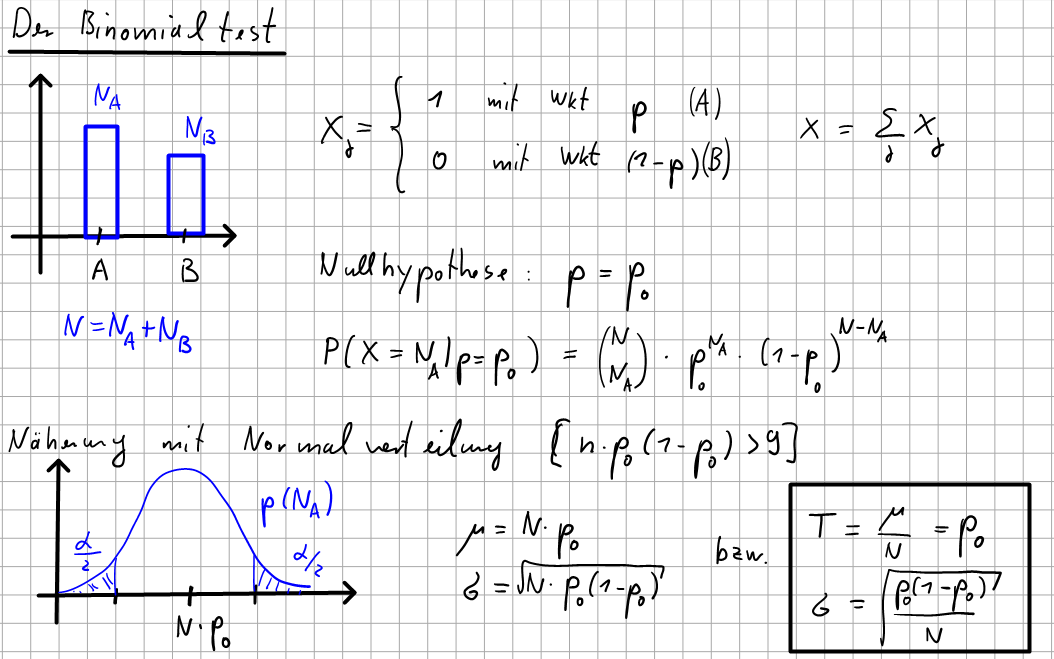

In [ ]:
p0 = 0.5
T = Nneg/Nges #Teststatistik 

mu = p0
sigma = np.sqrt(p0*(1-p0)/Nges)

p_onesided = 1-norm(mu,sigma).cdf(T) #Fläche, Rechts der Teststatistik
print('Mit Normalverteilung genäherter zweiseitiger p-Wert:',p_onesided*2)

In [ ]:
print('Erwartete Anzahl an Tagen mit Verlust:',Nges*0.5)
print('Beobachtete Anzahl an Tagen mit Verlust:',Nneg)

Wir sehen also, dass es mehr Tage mit Verlust gibt, als erwartet. Unsere Nullhypothese lautet, dass es genauso viele Verlusttage wie Gewinntage gibt. Für den zweiseitigen Test und oben berechneten p-Wert war die alternativ Hypothese, das es einen Unterschied gibt. Wir wollen allerdings testen ob es tatsächlich mehr Verlusttage gibt. Daher soll unsere alternativ Hypothese jetzt sein, dass die Wahrscheinlichkeit für ein Verlusttag größer ist als 50%. In diesem Fall ist der oben berechnete p-Wert bereits unser einseitiger p-Wert (ohne den Faktor 2) 

In [ ]:
print('Mit Normalverteilung genäherter einseitiger p-Wert:',p_onesided)

D.h. auf einem 5% Niveau würden wir tatsächlich sagen können, dass es im Mai und Juni für die betrachtete Aktie mehr Verlusttage als Gewinntage gibt.

Jetzt noch die exakten Werte mit den python Funktionen

In [ ]:
# Ha two-sided Es gibt keine Präferenz 
display(stats.binomtest(Nneg, n=Nges, p=0.5, alternative='two-sided'))
# Ha greater Es gibt mehr Gewinntage als Verlusttage im Mai/Juni
stats.binomtest(Nneg, n=Nges, p=0.5, alternative='greater')


## Resampling
Wir wollen jetzt noch die p-Werte mit einer Simulation bestimmen

In [ ]:
import random
def mache_AB_Teststatistik(N,p0):
    # zieht N mal mit Wkt p0 A und gibt NA/N zurück
    NA = np.sum(np.random.choice([1,0], N, p=[p0, 1-p0]))
    return NA/N

#mache die Simulation
p0 = 0.5
Nsim = 3000
t_vec = [mache_AB_Teststatistik(Nges,p0) for _ in range(Nsim)]

Graphische Darstellung

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(t_vec, bins=30, rwidth=0.9)
ax.axvline(x = T, color='red', lw=3)
ax.text(0.535, 80, 'Beobachteter\nUnterschied', bbox={'facecolor':'white'})
ax.set_xlabel('Teststatistik T Nneg/Nges')
ax.set_ylabel('Häufigkeit')
ax.set_xlim([0.45,0.57])
plt.tight_layout()
plt.show()


In [ ]:
# Einseitiger p-Wert
np.mean(t_vec > T)